# Classification


## MNIST DataSet

### Extracting the dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x , y = mnist['data'] , mnist['target']
x.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Viewing the image

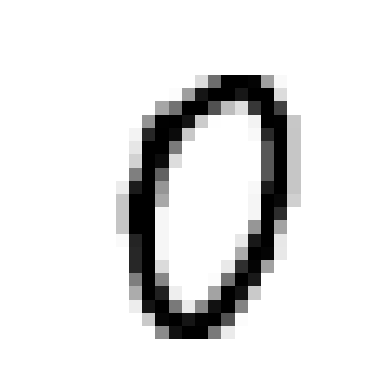

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x.iloc[1000,:]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[1000]

'0'

In [6]:
import numpy as np
y = y.astype(np.uint8)

### Spliting the DataSet

In [7]:
x_train , x_test , y_train , y_test = x[:60000] , x[60000:] , y[:60000] , y[60000:]

x_train.shape

### Training a Binary Classifier

In [8]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)

SGDClassifier()

In [10]:
sgd_clf.predict([some_digit])

E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    

    X_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.9673
0.9556
0.95675


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , x_train , y_train_5 , cv = 3 , scoring = "accuracy")                                   

array([0.9596 , 0.95335, 0.93675])

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf , x_train , y_train_5 , cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5 , y_train_pred)

array([[53035,  1544],
       [ 1246,  4175]], dtype=int64)

In [17]:
y_train_5_pretends = y_train_5
confusion_matrix(y_train_5 , y_train_5_pretends)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5 , y_train_pred)

0.7300227312467215

In [20]:
recall_score(y_train_5 , y_train_pred)

0.7701531082826046